# Web Scraping - Lab

## Introduction

Now that you've seen a more extensive example of developing a web scraping script, it's time to further practice and formalize that knowledge by writing functions to parse specific pieces of information from the web page and then synthesizing these into a larger loop that will iterate over successive web pages in order to build a complete dataset.

## Objectives

You will be able to:

* Navigate HTML documents using Beautiful Soup's children and sibling relations
* Select specific elements from HTML using Beautiful Soup
* Use regular expressions to extract items with a certain pattern within Beautiful Soup
* Determine the pagination scheme of a website and scrape multiple pages

## Lab Overview

This lab will build upon the previous lesson. In the end, you'll look to write a script that will iterate over all of the pages for the demo site and extract the title, price, star rating and availability of each book listed. Building up to that, you'll formalize the concepts from the lesson by writing functions that will extract a list of each of these features for each web page. You'll then combine these functions into the full script which will look something like this:  

```python
df = pd.DataFrame()
for i in range(2,51):
    url = "http://books.toscrape.com/catalogue/page-{}.html".format(i)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    new_titles = retrieve_titles(soup)
    new_star_ratings = retrieve_ratings(soup)
    new_prices = retrieve_prices(soup)
    new_avails = retrieve_avails(soup)
    ...
 ```

## Retrieving Titles

To start, write a function that extracts the titles of the books on a given page. The input for the function should be the `soup` for the HTML of the page.

In [1]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = "http://books.toscrape.com/catalogue/page-1.html"
html_page = requests.get(url)
soup = BeautifulSoup(html_page.content, 'html.parser')

In [3]:
titles = []
for x in soup.find_all('a'): #within these a tags, they have titles.
    try:
        titles.append(x['title'])
    except:
        continue

In [4]:
titles

['A Light in the Attic',
 'Tipping the Velvet',
 'Soumission',
 'Sharp Objects',
 'Sapiens: A Brief History of Humankind',
 'The Requiem Red',
 'The Dirty Little Secrets of Getting Your Dream Job',
 'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
 'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
 'The Black Maria',
 'Starving Hearts (Triangular Trade Trilogy, #1)',
 "Shakespeare's Sonnets",
 'Set Me Free',
 "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)",
 'Rip it Up and Start Again',
 'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991',
 'Olio',
 'Mesaerion: The Best Science Fiction Stories 1800-1849',
 'Libertarianism for Beginners',
 "It's Only the Himalayas"]

In [5]:
def retrieve_titles(soup):
    titles = []
    for x in soup.find_all('a'): #within these a tags, they have titles.
        try:
            titles.append(x['title'])
        except:
            continue
    return titles

## Retrieve Ratings

Next, write a similar function to retrieve the star ratings on a given page. Again, the function should take in the `soup` from the given HTML page and return a list of the star ratings for the books. These star ratings should be formatted as integers.

In [6]:
len(titles)

20

In [7]:
len(soup.find_all('p'))

60

In [8]:
regex = re.compile('.*star-rating *')

In [9]:
soup.find_all("p", {"class": regex})

[<p class="star-rating Three">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>, <p class="star-rating One">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>, <p class="star-rating One">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>, <p class="star-rating Four">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>, <p class="star-rating Five">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>, <p class="star-rating One">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class

In [10]:
len(soup.find_all("p", {"class": regex}))

20

In [11]:
soup.find_all("p", {"class": regex})[0].get('class')

['star-rating', 'Three']

In [12]:
num_dict = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}

In [13]:
ratings = []
for x in soup.find_all("p", {"class": regex}):
    ratings.append(num_dict[x.get('class')[1]])

ratings

[3, 1, 1, 4, 5, 1, 4, 3, 4, 1, 2, 4, 5, 5, 5, 3, 1, 1, 2, 2]

In [14]:
def retrieve_ratings(soup):
    ratings = []
    num_dict = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}
    for x in soup.find_all("p", {"class": regex}):
        ratings.append(num_dict[x.get('class')[1]])
    return ratings

## Retrieve Prices

Now write a function to retrieve the prices on a given page. The function should take in the `soup` from the given page and return a list of prices formatted as floats.

In [15]:
float(soup.find_all("p", {"class": "price_color"})[0].text[1:])

51.77

In [16]:
def retrieve_prices(soup):
    prices = []
    for x in soup.find_all("p", {"class": "price_color"}):
        prices.append(float(x.text[1:]))
    return prices

## Retrieve Availability

Write a function to retrieve whether each book is available or not. The function should take in the `soup` from a given html page and return a list of the availability for each book.

In [17]:
soup.find_all("p", {"class": "instock availability"})[0]

<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>

In [18]:
soup.find_all("p", {"class": "instock availability"})[0].text

'\n\n    \n        In stock\n    \n'

In [19]:
soup.find_all("p", {"class": "instock availability"})[0].text.strip()

'In stock'

In [20]:
availability = []
for x in soup.find_all("p", {"class": "instock availability"}):
    availability.append(x.text.strip())

In [21]:
len(availability)

20

In [22]:
def retrieve_availabilities(soup):
    availability = []
    for x in soup.find_all("p", {"class": "instock availability"}):
        availability.append(x.text.strip())
    return availability

## Create a Script to Retrieve All the Books From All 50 Pages

Finally, write a script to retrieve all of the information from all 50 pages of the books.toscrape.com website. 

In [23]:
url = "http://books.toscrape.com/catalogue/page-1.html"
html_page = requests.get(url)
soup = BeautifulSoup(html_page.content, 'html.parser')

titles = retrieve_titles(soup)
ratings = retrieve_ratings(soup)
prices = retrieve_prices(soup)
avail = retrieve_availabilities(soup)

In [24]:
df = pd.DataFrame({
    'titles': titles,
    'ratings': ratings,
    'prices': prices,
    'avail': avail
})

In [25]:
total_titles = []
total_ratings = []
total_prices = []
total_avail = []

for num in range(1, 51):
    if num % 5 == 0: # to see wheter our for loop is in process
        print(num)
    
    url = f"http://books.toscrape.com/catalogue/page-{num}.html"
    header = {'User-Agent': 'Mozilla/5.0'} # just in case of the https connection error
    html_page = requests.get(url, headers = header)
    soup = BeautifulSoup(html_page.content, 'html.parser')

    titles = retrieve_titles(soup)
    ratings = retrieve_ratings(soup)
    prices = retrieve_prices(soup)
    avail = retrieve_availabilities(soup)
    
    total_titles += titles
    total_ratings += ratings
    total_prices += prices
    total_avail += avail

5
10
15
20
25
30
35
40
45
50


In [26]:
df = pd.DataFrame({
    'titles': total_titles,
    'ratings': total_ratings,
    'prices': total_prices,
    'avail': total_avail
})

In [27]:
df.head()

,titles,ratings,prices,avail
0,A Light in the Attic,3,51.77,In stock
1,Tipping the Velvet,1,53.74,In stock
2,Soumission,1,50.10,In stock
3,Sharp Objects,4,47.82,In stock
4,Sapiens: A Brief History of Humankind,5,54.23,In stock


/Users/carrie/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<AxesSubplot:xlabel='ratings', ylabel='prices'>

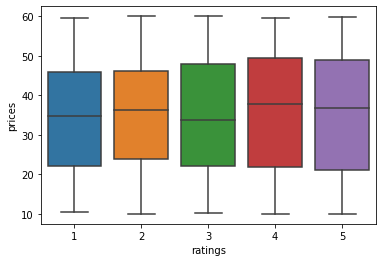

In [28]:
import seaborn as sns
sns.boxplot(x = 'ratings', y = 'prices', data = df)

## Level-Up: Write a new version of the script you just wrote. 

If you used URL hacking to generate each successive page URL, instead write a function that retrieves the link from the `"next"` button at the bottom of the page. Conversely, if you already used this approach above, use URL-hacking (arguably the easier of the two methods in this case).

In [29]:
url = "http://books.toscrape.com/catalogue/page-1.html"
html_page = requests.get(url)
soup = BeautifulSoup(html_page.content, 'html.parser')

In [30]:
soup.find('li', class_ = 'next').find('a')['href']

'page-2.html'

In [31]:
total_titles = []
total_ratings = []
total_prices = []
total_avail = []

initial_url = 'page-1.html'
while True:
        url = f"http://books.toscrape.com/catalogue/{initial_url}"
        html_page = requests.get(url)
        soup = BeautifulSoup(html_page.content, 'html.parser')
        #initial_url = soup.find('li', class_ = 'next').find('a')['href']
        print(initial_url)
        titles = retrieve_titles(soup)
        ratings = retrieve_ratings(soup)
        prices = retrieve_prices(soup)
        avail = retrieve_availabilities(soup)

        total_titles += titles
        total_ratings += ratings
        total_prices += prices
        total_avail += avail
        
        try:
            initial_url = soup.find('li', class_ = 'next').find('a')['href'] #page 50 does not have next button
        except:
            break

page-1.html
page-2.html
page-3.html
page-4.html
page-5.html
page-6.html
page-7.html
page-8.html
page-9.html
page-10.html
page-11.html
page-12.html
page-13.html
page-14.html
page-15.html
page-16.html
page-17.html
page-18.html
page-19.html
page-20.html
page-21.html
page-22.html
page-23.html
page-24.html
page-25.html
page-26.html
page-27.html
page-28.html
page-29.html
page-30.html
page-31.html
page-32.html
page-33.html
page-34.html
page-35.html
page-36.html
page-37.html
page-38.html
page-39.html
page-40.html
page-41.html
page-42.html
page-43.html
page-44.html
page-45.html
page-46.html
page-47.html
page-48.html
page-49.html
page-50.html


In [32]:
df1 = pd.DataFrame({
    'titles': total_titles,
    'ratings': total_ratings,
    'prices': total_prices,
    'avail': total_avail
})

In [33]:
df1.shape

(1000, 4)

In [34]:
df.head()

,titles,ratings,prices,avail
0,A Light in the Attic,3,51.77,In stock
1,Tipping the Velvet,1,53.74,In stock
2,Soumission,1,50.10,In stock
3,Sharp Objects,4,47.82,In stock
4,Sapiens: A Brief History of Humankind,5,54.23,In stock


In [35]:
df1.head()

,titles,ratings,prices,avail
0,A Light in the Attic,3,51.77,In stock
1,Tipping the Velvet,1,53.74,In stock
2,Soumission,1,50.10,In stock
3,Sharp Objects,4,47.82,In stock
4,Sapiens: A Brief History of Humankind,5,54.23,In stock


In [36]:
df.tail()

,titles,ratings,prices,avail
995,Alice in Wonderland (Alice's Adventures in Won...,1,55.53,In stock
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",4,57.06,In stock
997,A Spy's Devotion (The Regency Spies of London #1),5,16.97,In stock
998,1st to Die (Women's Murder Club #1),1,53.98,In stock
999,"1,000 Places to See Before You Die",5,26.08,In stock


In [37]:
df1.tail()

,titles,ratings,prices,avail
995,Alice in Wonderland (Alice's Adventures in Won...,1,55.53,In stock
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",4,57.06,In stock
997,A Spy's Devotion (The Regency Spies of London #1),5,16.97,In stock
998,1st to Die (Women's Murder Club #1),1,53.98,In stock
999,"1,000 Places to See Before You Die",5,26.08,In stock


## Summary

Well done! You just completed your first full web scraping project! You're ready to start harnessing the power of the web!